# Идентификация гриба

In [855]:
import numpy as np              
import pandas as pd             
import matplotlib.pyplot as plt 
import seaborn as sns           
import decimal
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn import ensemble


1) Загружаем файл из интернета:

In [560]:
data_raw = pd.read_csv('https://raw.githubusercontent.com/AntonKabarov/ML/main/mushrooms.csv',  sep=',')

In [561]:
data_raw

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Посмотрим на размеры таблицы количество строк и количество столбцов. Сделаем вывод данных.

In [562]:
data_raw.shape


(8124, 23)

In [563]:
print(data_raw)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

Вывод первых 15 строчек

In [564]:
print(data_raw.head(15))

   class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      p         x           s         n       t    p               f   
1      e         x           s         y       t    a               f   
2      e         b           s         w       t    l               f   
3      p         x           y         w       t    p               f   
4      e         x           s         g       f    n               f   
5      e         x           y         y       t    a               f   
6      e         b           s         w       t    a               f   
7      e         b           y         w       t    l               f   
8      p         x           y         w       t    p               f   
9      e         b           s         y       t    a               f   
10     e         x           y         y       t    l               f   
11     e         x           y         y       t    a               f   
12     e         b           s         y       t   

Вывод последних 15 строчек

In [565]:
print(data_raw.tail(15))


     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
8109     e         b           s         w       f    n               f   
8110     e         x           s         n       f    n               a   
8111     e         k           s         w       f    n               f   
8112     e         k           s         n       f    n               a   
8113     p         k           y         e       f    y               f   
8114     p         f           y         c       f    m               a   
8115     e         x           s         n       f    n               a   
8116     p         k           y         n       f    s               f   
8117     p         k           s         e       f    y               f   
8118     p         k           y         n       f    f               f   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f     

Вывод признаков

In [566]:
print(data_raw.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


Все признаки гриба в задаче классификации являются категориальными.Опишем что обозначает каждый признак.
class - класс 
cap-shape - форма шляпки гриба 
cap-surface - поверхность шляпки 
cap-color - цвет шляпки 
bruises - повреждения 
odor - запах 
gill-attachment - жаберное крепление 
gill-spacing - расстояние между жабрами 
gill-size - размер жабр 
gill-color - цвет жабр 
stalk-shape - форма стебля 
stalk-root - корень стебля 
stalk-surface-above-ring - поверхность стебля над кольцом
stalk-surface-below-ring - поверхность стебля под кольцом
stalk-color-below-ring - цвет стебля под кольцом
stalk-color-above-ring - цвет стебля над кольцом
veil-type - тип покрова
veil-color - цвет покрова
ring-number - количество кольцов гриба
ring-type - тип кольца гриба
spore-print-color - цвет отпечатка споры
population - популяция
habitat - ареал









Вывод общей информации о таблице данных и основные статистические характеристики.

In [567]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [568]:
data_raw.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Обработаем пропущенные значения.Для начала проверим их. Выведем значение каждого столбца.

In [569]:
for (Name, Data) in data_raw.iteritems():
    print(Name,Data.unique())


class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


как показано из данных, пропущенные значения отсутствуют 

Исключим признаки, которые не идентифицируют гриб как съедобный. Повреждение, популяция и ареал не являются проверкой съедобности гриба. Эти признаки являются нерелевантными признаками. 

In [570]:
data=data_raw.drop(['bruises','population','habitat'],axis=1)
categorical_columns = data.columns

Убедимся что нерелевантные признаки были удалены

In [571]:
data.shape


(8124, 20)

In [572]:
print(data)

     class cap-shape cap-surface cap-color odor gill-attachment gill-spacing  \
0        p         x           s         n    p               f            c   
1        e         x           s         y    a               f            c   
2        e         b           s         w    l               f            c   
3        p         x           y         w    p               f            c   
4        e         x           s         g    n               f            w   
...    ...       ...         ...       ...  ...             ...          ...   
8119     e         k           s         n    n               a            c   
8120     e         x           s         n    n               a            c   
8121     e         f           s         n    n               a            c   
8122     p         k           y         n    y               f            c   
8123     e         x           s         n    n               a            c   

     gill-size gill-color stalk-shape s

In [573]:
data.describe()

,class,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9
top,e,x,y,n,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w
freq,4208,3656,3244,2284,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388


Обучающая и тестовая выборка. Найдем бинарные признаки. Бинаризация номинальных признаков.

In [574]:
data_describe = data.describe(include = [object])


In [575]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['class', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape'] ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color']


К бинарным признакам относится: class, gill-attachment,gill-spacing,gill-size,stalk-shape.
Посмотрим какие значения принимает каждый бинарный признак.

In [576]:
for c in binary_columns:
   if(c != 'class'): 
    print(c, data[c].unique())

gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
stalk-shape ['e' 't']


В нашей задачи по признаку class будем предсказывать съедобность или несъедобность гриба. Поэтому его откидываем из рассмотрения бинарных признаков.

In [577]:
data['gill-attachment'].unique()


array(['f', 'a'], dtype=object)

In [578]:
data.loc[data['gill-attachment'] == 'f', 'gill-attachment'] = 0
data.loc[data['gill-attachment'] == 'a', 'gill-attachment'] = 1


In [579]:
data['gill-attachment'].describe()

count     8124
unique       2
top          0
freq      7914
Name: gill-attachment, dtype: int64

In [580]:
data['gill-spacing'].unique()

array(['c', 'w'], dtype=object)

In [581]:
data.loc[data['gill-spacing'] == 'c', 'gill-spacing'] = 0
data.loc[data['gill-spacing'] == 'w', 'gill-spacing'] = 1


In [582]:
data['gill-spacing'].describe()

count     8124
unique       2
top          0
freq      6812
Name: gill-spacing, dtype: int64

In [583]:
data['gill-size'].describe()

count     8124
unique       2
top          b
freq      5612
Name: gill-size, dtype: object

In [584]:
data.loc[data['gill-size'] == 'n', 'gill-size'] = 0
data.loc[data['gill-size'] == 'b', 'gill-size'] = 1

In [585]:
data['gill-size'].describe()

count     8124
unique       2
top          1
freq      5612
Name: gill-size, dtype: int64

In [586]:
data.loc[data['stalk-shape'] == 'e', 'stalk-shape'] = 0
data.loc[data['stalk-shape'] == 't', 'stalk-shape'] = 1

In [587]:
data['stalk-shape'].describe()

count     8124
unique       2
top          1
freq      4608
Name: stalk-shape, dtype: int64

Убедимся что все бинарные признаки отработаны ('gill-attachment','gill-spacing','gill-size','stalk-shape').

In [588]:
for (Name, Data) in data.iteritems():
    print(Name,Data.unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment [0 1]
gill-spacing [0 1]
gill-size [0 1]
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape [0 1]
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']


In [589]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c',
       'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p',
       'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'odor_a',
       'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s',
       'odor_y', 'gill-color_b', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-root_?', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-above-ring_y', 'stalk-surface-below-ring_f',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-

Нормализация признаков. Соединяем в одну таблицу

In [590]:
data = pd.concat((data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(8124, 98)


In [591]:
data.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,0.285574,0.000492,0.314623,0.399311,...,0.488429,0.005908,0.200886,0.230428,0.242245,0.005908,0.008863,0.005908,0.293944,0.005908
std,0.229235,0.022185,0.487321,0.302562,0.062641,0.497527,0.451715,0.022185,0.464394,0.489787,...,0.499897,0.076644,0.400688,0.421133,0.428468,0.076644,0.093729,0.076644,0.455595,0.076644
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [592]:
X = data.drop(['class'], axis = 1)
y = data['class']
feature_names = X.columns

In [593]:
type(feature_names)

pandas.core.indexes.base.Index

In [594]:
feature_names

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y', 'cap-color_b', 'cap-color_c',
       'cap-color_e', 'cap-color_g', 'cap-color_n', 'cap-color_p',
       'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'odor_a',
       'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p', 'odor_s',
       'odor_y', 'gill-color_b', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-root_?', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_f',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s',
       'stalk-surface-above-ring_y', 'stalk-surface-below-ring_f',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-

In [595]:
print(X.shape)
print(y.shape)
N, d = X.shape

(8124, 97)
(8124,)


In [596]:
y.value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [598]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

5686 2438


In [599]:
5686  + 2438


8124

Задача заключается в нахождение съедобного гриба

In [1207]:
y == 'e'

0       False
1        True
2        True
3       False
4        True
        ...  
8119     True
8120     True
8121     True
8122    False
8123     True
Name: class, Length: 8124, dtype: bool

## Knn - метод ближайших соседей

Выберем параметр n_neighbors = 10. Обучим модель

In [602]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

Данные для прогноза, которая модель раньше не видела. Найдем err_train и err_test.

In [603]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_pred)
print('err_train=',err_train,'err_test=', err_test)

err_train= 0.0005276116778051355 err_test= 0.00041017227235438887


In [604]:
print(confusion_matrix(y_test, y_test_pred))


[[1257    0]
 [   1 1180]]


Другие метрики

In [825]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1490
           p       1.00      1.00      1.00      1354

    accuracy                           1.00      2844
   macro avg       1.00      1.00      1.00      2844
weighted avg       1.00      1.00      1.00      2844



Подбор гиперпараметра. Подберем значения k таким образом, что бы уменьшить ошибку err_test. Воспользуемся объектом GridSearchCV (cross-validation).

In [605]:
nnb = [1,3,5, 7,10,15,20,25,30,35]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.0 5


Метод класса GridSearchCV подобрал оптимальный параметр k = 5. Снова обучим модель.

In [606]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(Xx_train, Yy_train)

KNeighborsClassifier()

In [607]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_pred)
print('err_train=',err_train,'err_test=', err_test)

err_train= 0.0 err_test= 0.0


Основной параметр в методе knn - это k. Построем график зависимости ошибок от значения гиперпараметра k.

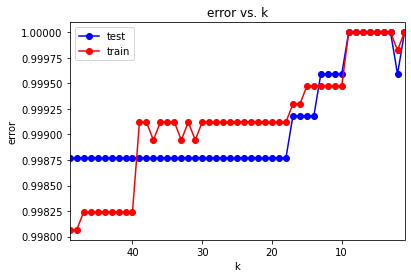

In [609]:
k = list(range(1,50))
test = []
train = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    param = knn.score(X_test,y_test)
    param2 = knn.score(X_train,y_train)
    test.append(param)
    train.append(param2)
plt.plot(k, test, 'b-o', label ='test')
plt.plot(k, train, 'r-o', label ='train')
plt.xlim([np.max(k), np.min(k)])
plt.xlabel('k')
plt.ylabel('error')
plt.title('error vs. k')
plt.legend()

Когда k маленькое, то обучения больше, а на test меньше. А когда k больше, то обучения меньше.

## Нейронная сеть

Разобъем данные на обучающую и тестовую выборки

In [1315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 10)
N_test, _ = X_test.shape

Обучим модель

In [1316]:
mlp_model = MLPClassifier(hidden_layer_sizes = (4), solver = 'lbfgs', activation = 'logistic', random_state = 7)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=4, random_state=7,
              solver='lbfgs')

In [1317]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_pred)
print('err_train=',err_train,'err_test=', err_test)


err_train= 0.010795454545454546 err_test= 0.00808720112517581


Увеличим число слоев

In [1318]:
mlp_model = MLPClassifier(hidden_layer_sizes = (4, 5), solver = 'lbfgs', activation = 'logistic', random_state = 7)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(4, 5), random_state=7,
              solver='lbfgs')

In [1319]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_pred)
print('err_train=',err_train,'err_test=', err_test)

err_train= 0.010795454545454546 err_test= 0.00808720112517581


Переобучение не наблюдается при увелечение слоев

Подберем оптимальное значение параметра.

In [1569]:
alpha_arr = np.logspace(-1, 0.5, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (4), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 7)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Построим график ошибки от параметра регуляризации

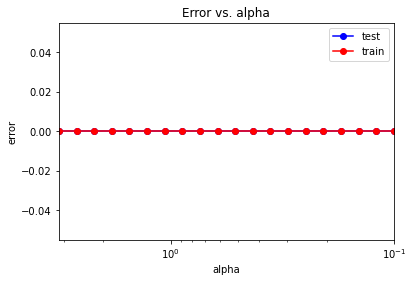

In [1570]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [1571]:
print(alpha_arr)

[0.1        0.11993539 0.14384499 0.17252105 0.20691381 0.24816289
 0.29763514 0.35696988 0.42813324 0.51348329 0.61584821 0.73861998
 0.88586679 1.06246783 1.27427499 1.52830673 1.83298071 2.19839265
 2.6366509  3.16227766]


In [1572]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0


In [1573]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

0.1


Нашли оптимальный параметр alpha_opt = 0.1

Повторим обучение

In [1574]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (6,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 6)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.0


Построим матрицу рассоглосования

In [1575]:
M = confusion_matrix(y_test, y_test_pred)
print(M)


[[1490    0]
 [   0 1354]]


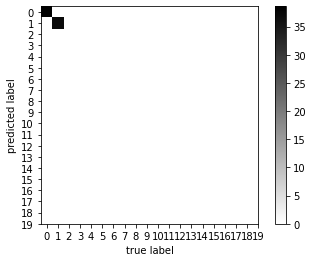

In [1576]:
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(20))
plt.yticks(range(20))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

Другие метрики

In [1577]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1490
           p       1.00      1.00      1.00      1354

    accuracy                           1.00      2844
   macro avg       1.00      1.00      1.00      2844
weighted avg       1.00      1.00      1.00      2844



Найдем число оптимальное число нейронов

In [1578]:
neurons_arr = np.arange(1, 10, 1)
test_err = []
train_err = []
for neurons in neurons_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neurons, neurons), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 7)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

Построим график оптимальное число нейронов.

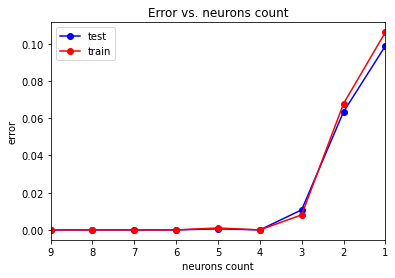

In [1579]:
plt.plot(neurons_arr, train_err, 'b-o', label = 'test')
plt.plot(neurons_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(neurons_arr), np.min(neurons_arr)])
plt.title('Error vs. neurons count')
plt.xlabel('neurons count')
plt.ylabel('error')
plt.legend()
pass

In [1580]:
neurons_opt = neurons_arr[test_err == min_test_err]
print(neurons_opt)

[4 6 7 8 9]


Проверим оптимальное число нейронов

In [1605]:
mlp_model = MLPClassifier(hidden_layer_sizes = (6,8), solver = 'lbfgs', activation = 'logistic', random_state = 7)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(6, 8), random_state=7,
              solver='lbfgs')

In [1606]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_pred)
print('err_train=',err_train,'err_test=', err_test)

err_train= 0.011553030303030303 err_test= 0.00949367088607595


Переобучение не наблюдается.

## Random forests

In [1607]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

Обучим модель

In [1608]:
cf = ensemble.RandomForestClassifier(n_estimators = 10)
cf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [1609]:
err_train = np.mean(y_train != cf.predict(X_train))
err_test  = np.mean(y_test  != cf.predict(X_test))

print(err_train)
print(err_test)

0.0
0.0


D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


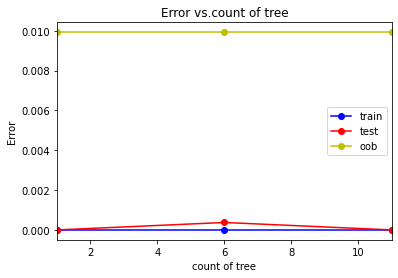

In [1610]:
tree_arr = np.arange(1, 15, 5)
test_err = []
train_err = []
oob_err = []

for tree in tree_arr:
    cf = ensemble.RandomForestClassifier(n_estimators = tree,oob_score = True)
    cf.fit(X_train, y_train)
    y_train_pred = cf.predict(X_train)
    y_test_pred = cf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1-rf.oob_score_)
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'y-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs.count of tree')
plt.xlabel('count of tree')
plt.ylabel('Error')
plt.legend()
pass

Минимальное число ошибок на train и test выборках

In [1611]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print( min_train_err)
print( min_test_err)

0.0
0.0


Если параметр max_depth не стоит, то наблюдаем переобучение. Установим параметр max_depth на высоту деревьев

In [1618]:
cf = ensemble.RandomForestClassifier(n_estimators = 10, max_depth=4)
cf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=10)

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


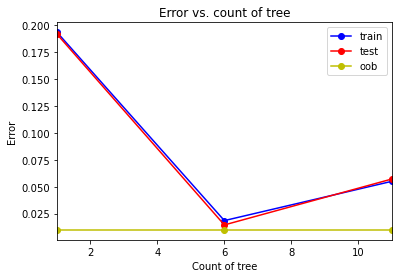

In [1624]:
tree_arr = np.arange(1, 15, 5)
test_err = []
train_err = []
oob_err = []

for tree in tree_arr:
    cf = ensemble.RandomForestClassifier(n_estimators = tree,oob_score = True, max_depth=4)
    cf.fit(X_train, y_train)
    y_train_pred = cf.predict(X_train)
    y_test_pred = cf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1-rf.oob_score_)
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'y-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

In [1625]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print('err_train=', min_train_err,'err_test=',min_test_err)


err_train= 0.0185559434135587 err_test= 0.01454681089145841


In [1626]:
trees_opt = tree_arr[test_err == min_test_err]
print(trees_opt)

[6]


Проверим оптимальное число деревьев

In [1629]:
cf = ensemble.RandomForestClassifier(n_estimators = 6, max_depth=4)
cf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=6)

In [1630]:
err_train = np.mean(y_train != cf.predict(X_train))
err_test  = np.mean(y_test  != cf.predict(X_test))

print('err_train=',err_train,'err_test=',err_test)


err_train= 0.03270255373874702 err_test= 0.02909362178291682


При уменьшение высоты деревьев наблюдается переобучение.

In [1631]:
cf = ensemble.RandomForestClassifier(n_estimators = 6, max_depth=3)
cf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=6)

In [1632]:
err_train = np.mean(y_train != cf.predict(X_train))
err_test  = np.mean(y_test  != cf.predict(X_test))

print('err_train=',err_train,'err_test=',err_test)


err_train= 0.0731214403821422 err_test= 0.07683700111898545
